# <font color =green> *Text data analysis* </font>

## <font color =red> *Data Description* </font>

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Data includes 


- Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
- 256,059 Users and 74,258 products
- 260 users with > 50 reviews


# `problem statement`

The aim here will be to `predict the score for the given text review` by an individual for the product he brought on amazon.

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv(r"C:\Users\HAREESH\Downloads\ML\NLP-project\amazon_reviews_sentiment_raw_data.csv")

In [43]:
df.head()

,Unnamed: 0,productId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


In [44]:
# removing unnamed column
df= df.drop(["Unnamed: 0"],axis=1)

In [45]:
df.head()

,productId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


In [9]:
# checking columns names
df.columns

Index(['productId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText'],
      dtype='object')

In [46]:
# missing values
df.isnull().sum()

productId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

# observations-:
- There may no  be null values

In [47]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   productId               100000 non-null  object
 1   UserId                  100000 non-null  object
 2   ProfileName             100000 non-null  object
 3   HelpfulnessNumerator    100000 non-null  int64 
 4   HelpfulnessDenominator  100000 non-null  int64 
 5   Score                   100000 non-null  int64 
 6   Time                    100000 non-null  int64 
 7   ReviewSummary           100000 non-null  object
 8   ReviewText              100000 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB


In [48]:
# checking duplicates values
df.duplicated(keep="first").sum()

49

In [49]:
# removing duplicate values
df.drop_duplicates(keep="first",inplace=True)
df.duplicated(keep="first").sum()

0

In [50]:
df.shape

(99951, 9)

In [51]:
df["Helpfulness"] = (df["HelpfulnessNumerator"])/(df["HelpfulnessDenominator"])

In [52]:
df.head()

,productId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,1.0
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,NaN
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1.0
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,1.0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,NaN


In [53]:
df.isnull().sum()

productId                     0
UserId                        0
ProfileName                   0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Score                         0
Time                          0
ReviewSummary                 0
ReviewText                    0
Helpfulness               47678
dtype: int64

In [54]:
# filling missing / null values
df["Helpfulness"]=df['Helpfulness'].fillna(0)

In [55]:
df.isnull().sum()

productId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
Helpfulness               0
dtype: int64

In [56]:
df1 =df[["ReviewText","Score"]]

In [60]:
df1.to_csv("rawdata_amazom.csv")

In [57]:
df1.head(10)

,ReviewText,Score
0,I have bought several of the Vitality canned ...,5
1,Product arrived labeled as Jumbo Salted Peanu...,1
2,This is a confection that has been around a f...,4
3,If you are looking for the secret ingredient ...,2
4,Great taffy at a great price. There was a wi...,5
5,I got a wild hair for taffy and ordered this ...,4
6,This saltwater taffy had great flavors and wa...,5
7,This taffy is so good. It is very soft and c...,5
8,Right now I'm mostly just sprouting this so m...,5
9,This is a very healthy dog food. Good for the...,5


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Score', ylabel='count'>

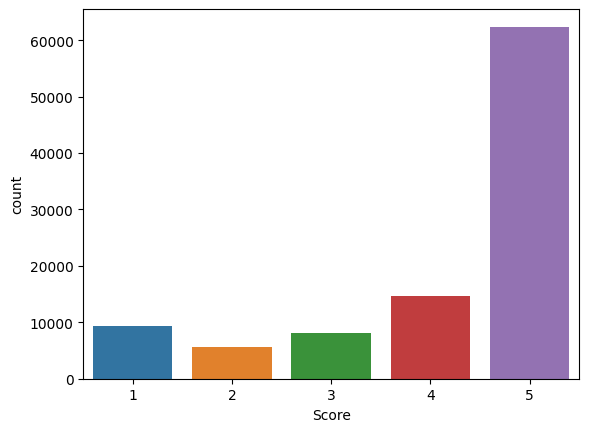

In [16]:
sns.countplot(x="Score",data=df)

In [ ]:
df.columns

Index(['productId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Helpfulness'],
      dtype='object')

In [15]:
df["Score"].value_counts()

5    62380
4    14641
1     9309
3     8055
2     5566
Name: Score, dtype: int64

In [ ]:
from sklearn.metrics.pairwise import normalize
df["Score"].value_counts(normalize=True)

5    0.624106
4    0.146482
1    0.093136
3    0.080589
2    0.055687
Name: Score, dtype: float64

<Axes: xlabel='HelpfulnessDenominator', ylabel='HelpfulnessNumerator'>

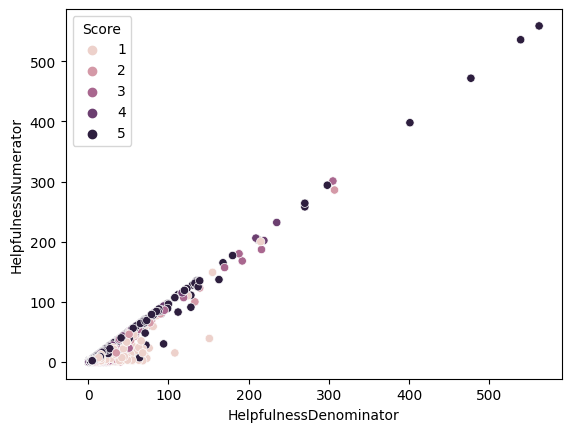

In [ ]:
sns.scatterplot(x=df["HelpfulnessDenominator"],y=df["HelpfulnessNumerator"],hue=df["Score"])

# obsrevation :
- There are 5 scores are more to compare other scores
- The Data points are in liner relationship
- If the denominator is incraesing then numerator is incrasing

<Axes: xlabel='HelpfulnessDenominator', ylabel='Score'>

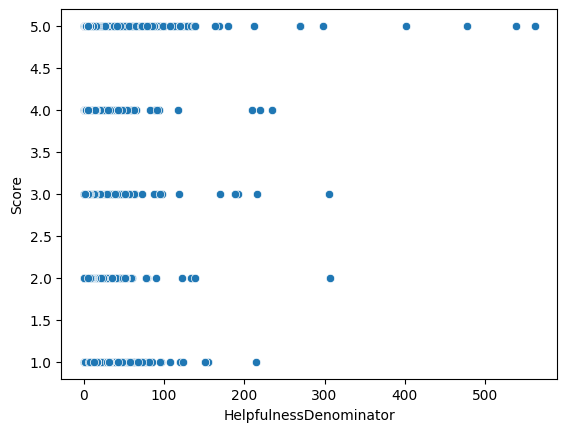

In [ ]:
sns.scatterplot(x=df["HelpfulnessDenominator"],y=df["Score"])

In [23]:
df1.head()

,ReviewText,Score
0,I have bought several of the Vitality canned ...,5
1,Product arrived labeled as Jumbo Salted Peanu...,1
2,This is a confection that has been around a f...,4
3,If you are looking for the secret ingredient ...,2
4,Great taffy at a great price. There was a wi...,5


In [24]:
df1.shape

(99951, 2)

In [25]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [26]:
# step 1
X = df1[["ReviewText"]]
y = df1["Score"]

In [27]:
X.head()

,ReviewText
0,I have bought several of the Vitality canned ...
1,Product arrived labeled as Jumbo Salted Peanu...
2,This is a confection that has been around a f...
3,If you are looking for the secret ingredient ...
4,Great taffy at a great price. There was a wi...


In [28]:
y.head()

0    5
1    1
2    4
3    2
4    5
Name: Score, dtype: int64

In [29]:
# split the data train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(74963, 1) (74963,)
(24988, 1) (24988,)


# text  data preprocessing

In [30]:
X_train.head()

,ReviewText
47154,Evaporated cane juice.................really!...
79305,These are our favorite bars - not too sweet a...
72856,I am not happy with Gerber at all. I researc...
65005,"I love the easiness of making, the combinatio..."
3535,It wasn't a bad purchase at just $9.99 throug...


In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HAREESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HAREESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HAREESH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
# object creation
stemmer = PorterStemmer()

In [35]:
lemmatizer = WordNetLemmatizer()

In [37]:
# text data preparation
def process(Raw_data,flag):
    
  # removing of special characters
    sentance = re.sub("[^a-zA-Z]"," ",Raw_data)
  # convert to lower case charcters
    sentance = sentance.lower()
  # split into words
    token = sentance.split()
  # applying stopwords
    clean_token = [ word for word in token if word not in stopwords.words("english") ]

  # applying flag [stemmer,lemmatizer]
    if flag==stemmer:
        clean_token = [stemmer.stem(word) for word in clean_token]
    else:
        clean_token=[lemmatizer.lemmatize(word) for word in clean_token]
    return pd.Series([" ".join(clean_token), len(clean_token)])



In [38]:
from tqdm import tqdm, tqdm_notebook

In [39]:
tqdm.pandas()

In [ ]:
# step-3.2  [ applying lemmalizer]
temp_df = X_train['ReviewText'].progress_apply(lambda x: process(x, 'lemm'))

temp_df.head()

In [32]:
temp_df.columns=["clean_text_lemm","text_len_lemm"]
temp_df.head()

,clean_text_lemm,text_len_lemm
47154,evaporated cane juice really purpose bad ingre...,20
79305,favorite bar sweet natural order bulk every ti...,21
72856,happy gerber researched product list ingredien...,28
65005,love easiness making combination flavor bowl r...,16
3535,bad purchase warehouse deal fulfilled amazon s...,18


In [33]:
X_train =pd.concat([X_train,temp_df],axis=1)
X_train.head()

,ReviewText,clean_text_lemm,text_len_lemm
47154,Evaporated cane juice.................really!...,evaporated cane juice really purpose bad ingre...,20
79305,These are our favorite bars - not too sweet a...,favorite bar sweet natural order bulk every ti...,21
72856,I am not happy with Gerber at all. I researc...,happy gerber researched product list ingredien...,28
65005,"I love the easiness of making, the combinatio...",love easiness making combination flavor bowl r...,16
3535,It wasn't a bad purchase at just $9.99 throug...,bad purchase warehouse deal fulfilled amazon s...,18


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X_train_transform = vector.fit_transform(temp_df["clean_text_lemm"])

# creating word cloud

In [ ]:
from wordcloud import wordcloud

In [ ]:
y_train.head()

47154    1
79305    5
72856    1
65005    5
3535     3
Name: Score, dtype: int64

In [ ]:
four_df=X_train.loc[y_train==4,:]
four_df.head()

,ReviewText,clean_text_lemm,text_len_lemm
75798,I don't drink very many energy drinks. I've t...,drink many energy drink taken nodoz occasion h...,111
72691,Our basset hound recently tried FunBites Skin...,basset hound recently tried funbites skin coat...,86
44155,"Not a big fan of flavored coffee, bought thes...",big fan flavored coffee bought wife nice coffe...,13
13543,"If you love Pop Tarts, the low fat option is ...",love pop tart low fat option great choice tast...,32
33530,I like a bold coffee that isn't bitter and th...,like bold coffee bitter one meet requirement k...,16


In [ ]:
words = ' '.join(four_df['clean_text_lemm'])

print(words[:100])

drink many energy drink taken nodoz occasion hour energy drink caffeine candy therefore sure expect 


In [ ]:
clean_word=' '.join([word for word in words.split() if 'br' not in word])

In [ ]:
four_wordcloud=wordcloud.WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800).generate(clean_word)

# 4 score wordcloud plot

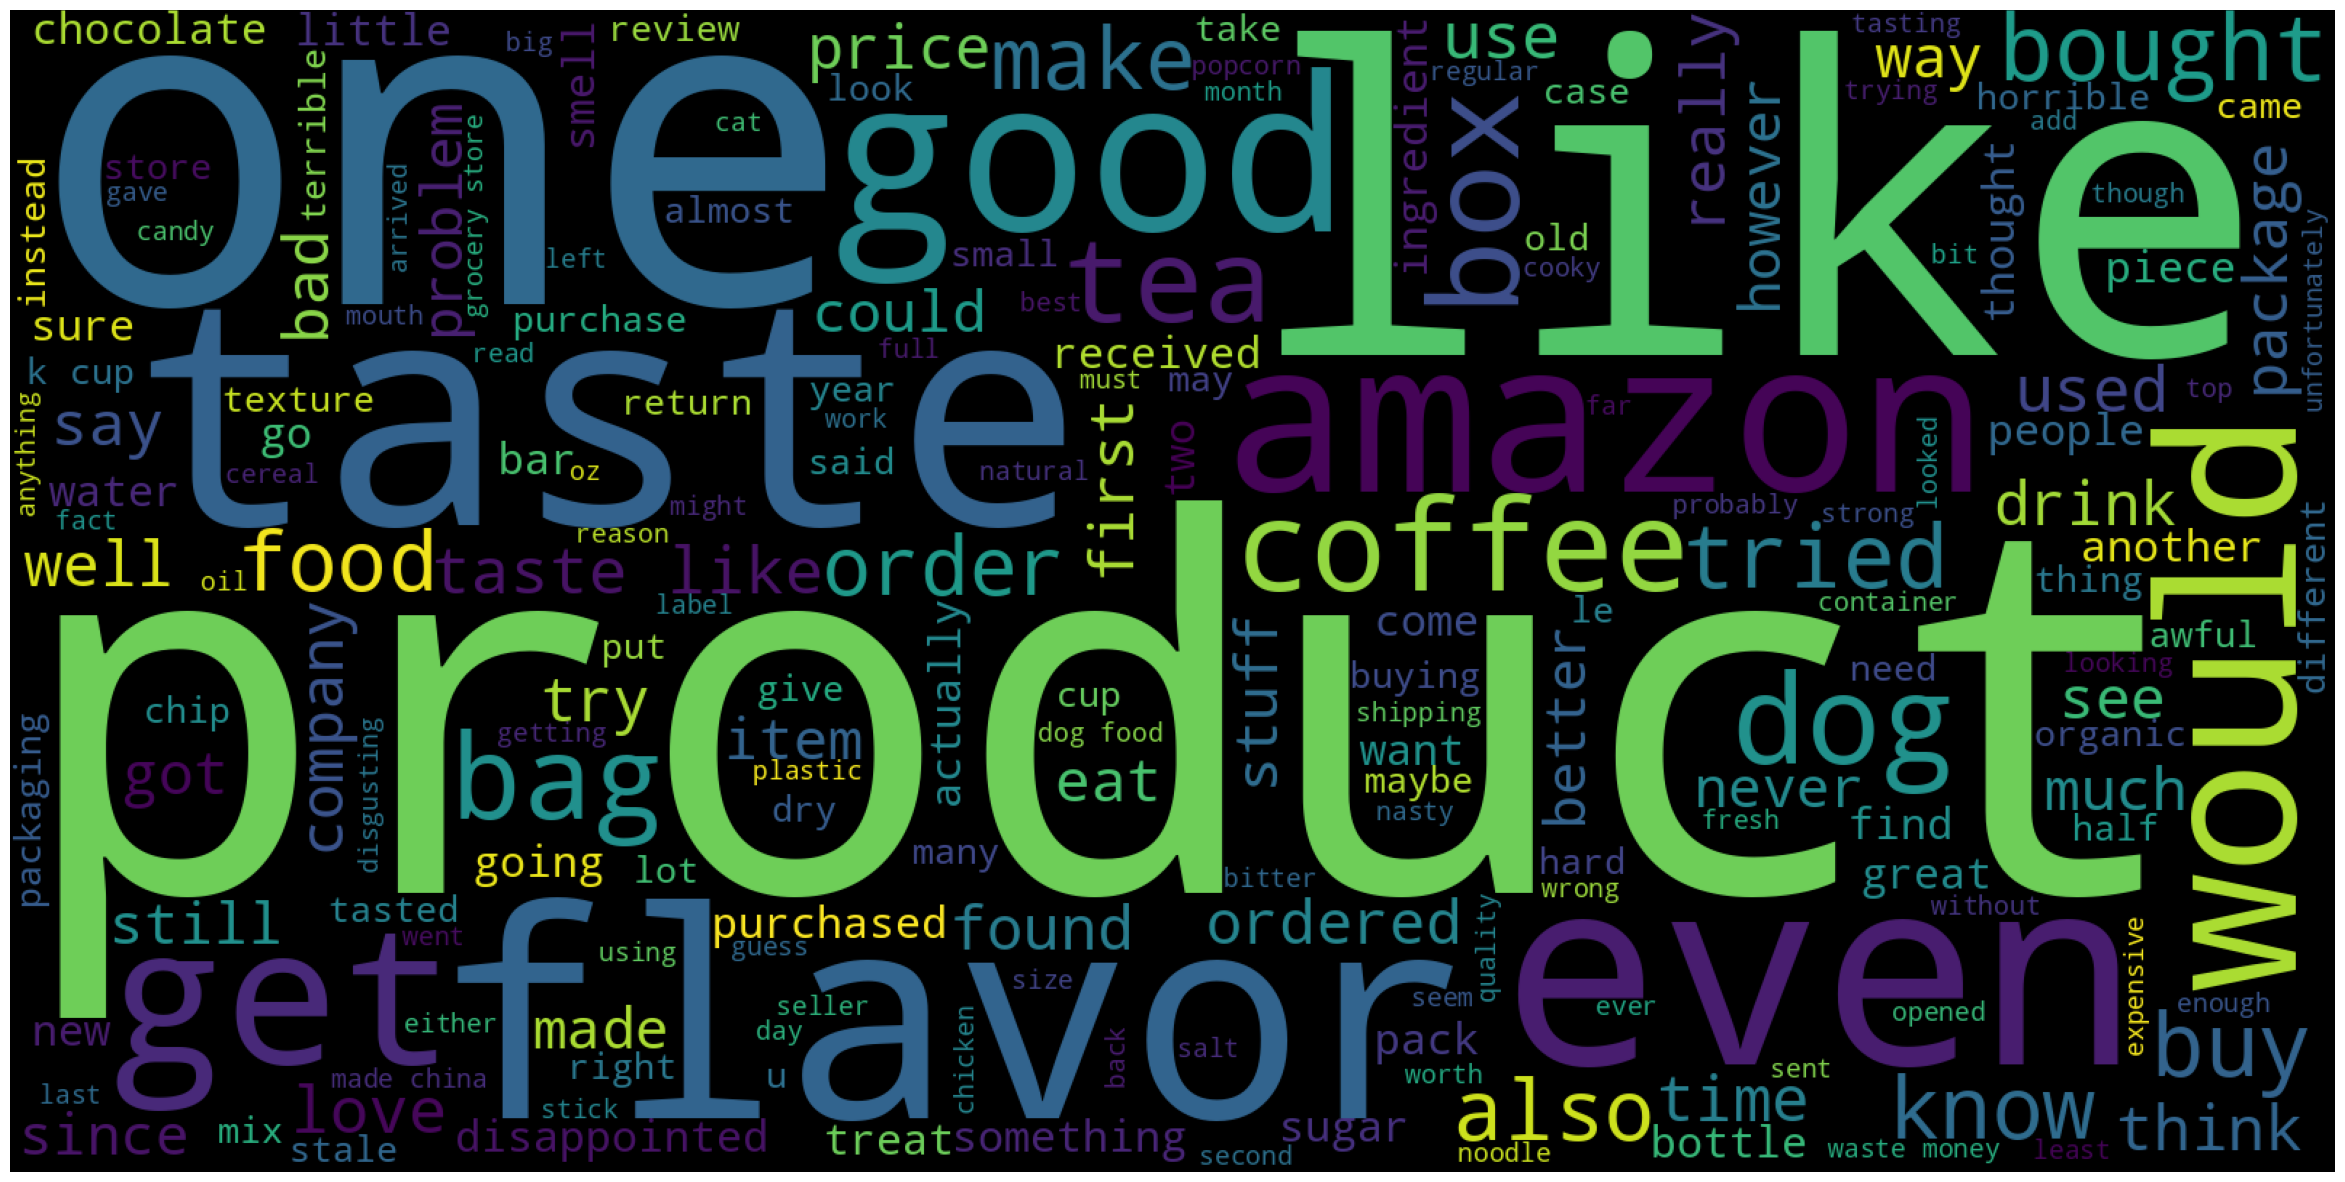

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(four_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
one_df=X_train.loc[y_train==1,:]
one_df.head()

,ReviewText,clean_text_lemm,text_len_lemm
47154,Evaporated cane juice.................really!...,evaporated cane juice really purpose bad ingre...,20
72856,I am not happy with Gerber at all. I researc...,happy gerber researched product list ingredien...,28
49910,I can't believe how gross these bars are! Th...,believe gross bar sounded pretty good reading ...,52
99635,I know i'm responsible for what i buy and who...,know responsible buy buy highly reccomend guy ...,18
88020,didn't nestle's stop using cans like this for...,nestle stop using can like nestle quick little...,31


In [ ]:
words = ' '.join(one_df['clean_text_lemm'])

print(words[:100])

evaporated cane juice really purpose bad ingredient really serve stevia sweetener add crap always th


In [ ]:
clean_word=' '.join([word for word in words.split() if 'br'  not in word])

In [ ]:
one_wordcloud=wordcloud.WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800).generate(clean_word)

### 1 score wordcloud plot

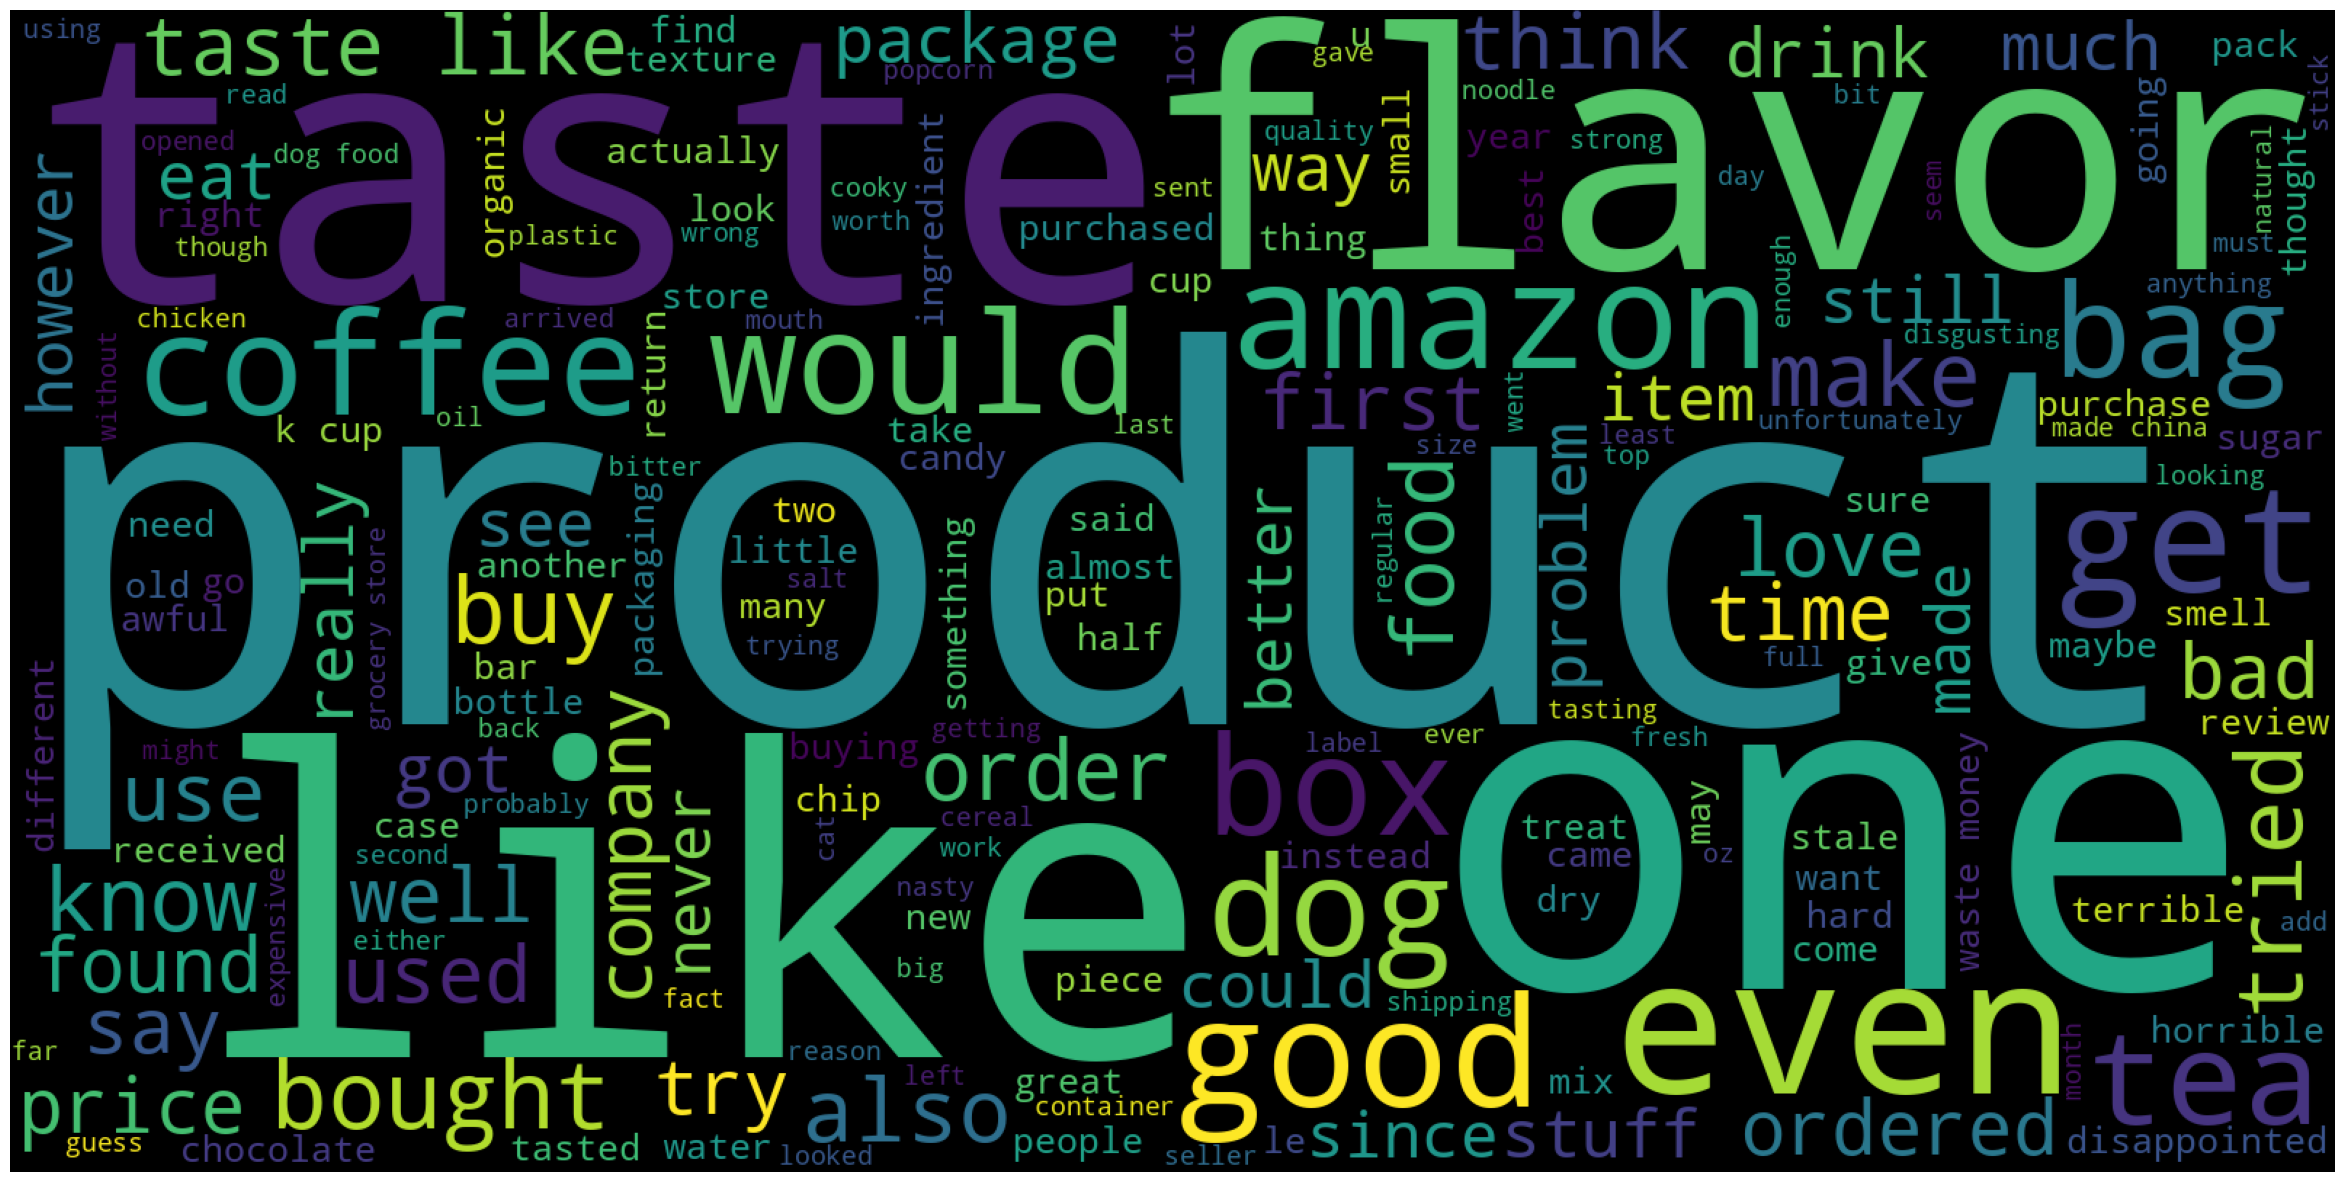

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(one_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# step-4   [Bulding model]
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_transform,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test

,ReviewText
74766,My pekingese loves these!She is known to be q...
76085,I read the reviews and did some non-trivial r...
62111,Our family found Stash's Double Bergamot in a...
67582,"I enjoy this coffee occationally, but the off..."
34360,I give this to my dog as suggested by her vet...
...,...
75474,I have been looking for a raw organic cacao p...
58157,you will find this capellini the best you wil...
40296,This cereal is very hard to find and after do...
68578,Adds great flavor to meats and stews...ground...


In [35]:
# step 5 test data preprocessing
temp_df1 =X_test["ReviewText"].progress_apply(lambda x: process (x,"lemm"))
temp_df1.head()

100%|██████████| 24988/24988 [04:12<00:00, 99.01it/s] 


,0,1
74766,pekinese love known quite picky eater ordered ...,53
76085,read review non trivial research online buying...,27
62111,family found stash double bergamot grocery sto...,50
67582,enjoy coffee occationally office split right m...,14
34360,give dog suggested vet help keep teeth clean u...,14


In [36]:
temp_df1.columns=['clean_text_lemm','clean_len_lemm']
temp_df1.head()

,clean_text_lemm,clean_len_lemm
74766,pekinese love known quite picky eater ordered ...,53
76085,read review non trivial research online buying...,27
62111,family found stash double bergamot grocery sto...,50
67582,enjoy coffee occationally office split right m...,14
34360,give dog suggested vet help keep teeth clean u...,14


In [37]:
X_test=pd.concat([X_test,temp_df1],axis=1)
X_test.head()

,ReviewText,clean_text_lemm,clean_len_lemm
74766,My pekingese loves these!She is known to be q...,pekinese love known quite picky eater ordered ...,53
76085,I read the reviews and did some non-trivial r...,read review non trivial research online buying...,27
62111,Our family found Stash's Double Bergamot in a...,family found stash double bergamot grocery sto...,50
67582,"I enjoy this coffee occationally, but the off...",enjoy coffee occationally office split right m...,14
34360,I give this to my dog as suggested by her vet...,give dog suggested vet help keep teeth clean u...,14


In [38]:
X_test_transform=vector.transform(X_test['clean_text_lemm'])


In [ ]:
X_test_transform.shape

(24988, 38427)

In [ ]:
# train data having 74963 rows and 38427 columns
X_train_transform.shape

(74963, 38427)

In [ ]:
# step 6
y_test_predict=reg.predict(X_test_transform)

In [ ]:
# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))


accuracy: 0.7026572754922362
class :               precision    recall  f1-score   support

           1       0.65      0.61      0.63      2391
           2       0.35      0.25      0.29      1436
           3       0.38      0.29      0.33      1974
           4       0.42      0.26      0.32      3593
           5       0.79      0.91      0.85     15594

    accuracy                           0.70     24988
   macro avg       0.52      0.46      0.48     24988
weighted avg       0.67      0.70      0.68     24988



# knn classifier model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_pred_k =classifier.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_k))
print("class :",classification_report(y_test,y_test_pred_k))



accuracy: 0.5526652793340804
class :               precision    recall  f1-score   support

           1       0.34      0.19      0.25      2391
           2       0.15      0.13      0.14      1436
           3       0.16      0.15      0.15      1974
           4       0.25      0.19      0.22      3593
           5       0.69      0.78      0.73     15594

    accuracy                           0.55     24988
   macro avg       0.32      0.29      0.30     24988
weighted avg       0.52      0.55      0.53     24988



# Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_pred_d =classifier.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_d))
print("class :",classification_report(y_test,y_test_pred_d))


accuracy: 0.6399871938530495
class :               precision    recall  f1-score   support

           1       0.50      0.47      0.48      2391
           2       0.32      0.26      0.29      1436
           3       0.31      0.27      0.29      1974
           4       0.36      0.33      0.34      3593
           5       0.77      0.82      0.79     15594

    accuracy                           0.64     24988
   macro avg       0.45      0.43      0.44     24988
weighted avg       0.62      0.64      0.63     24988



# Random forestr model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_pred_r =classifier.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_r))
print("class :",classification_report(y_test,y_test_pred_r))


accuracy: 0.7062189851128542
class :               precision    recall  f1-score   support

           1       0.89      0.37      0.52      2391
           2       0.95      0.17      0.28      1436
           3       0.88      0.16      0.28      1974
           4       0.85      0.18      0.30      3593
           5       0.69      1.00      0.81     15594

    accuracy                           0.71     24988
   macro avg       0.85      0.38      0.44     24988
weighted avg       0.76      0.71      0.64     24988



# support vector mechines


In [ ]:
from sklearn.svm  import SVC
classifier = SVC()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_pred_s =classifier.predict(X_test_transform)
# step 7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_pred_s))
print("class :",classification_report(y_test,y_test_pred_s))


accuracy: 0.7108612133824236
class :               precision    recall  f1-score   support

           1       0.70      0.55      0.62      2391
           2       0.60      0.14      0.23      1436
           3       0.58      0.20      0.29      1974
           4       0.64      0.15      0.24      3593
           5       0.72      0.98      0.83     15594

    accuracy                           0.71     24988
   macro avg       0.65      0.40      0.44     24988
weighted avg       0.69      0.71      0.65     24988



# Adaboost model

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transform,y_train)

# step 6
y_test_pred_a =classifier.predict(X_test_transform)
# step 7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_pred_a))
#print("class :",classification_report(y_test,y_test_pred_a))


accuracy: 0.6643588922682888


# naive bayes model

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_transform,y_train)

# step 6
y_test_pred_nb =nb.predict(X_test_transform)
# step 7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_pred_nb))
print("class :",classification_report(y_test,y_test_pred_nb))


accuracy: 0.687690091243797
class :               precision    recall  f1-score   support

           1       0.59      0.57      0.58      2391
           2       0.40      0.10      0.16      1436
           3       0.35      0.19      0.25      1974
           4       0.38      0.31      0.34      3593
           5       0.78      0.91      0.84     15594

    accuracy                           0.69     24988
   macro avg       0.50      0.42      0.43     24988
weighted avg       0.65      0.69      0.66     24988



# applying TFIDF text transform technique

In [ ]:
# step-3
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X_train_transform=vector.fit_transform(X_train['clean_text_lemm'])

# logestic regression with TFIDF

In [ ]:
# step 4
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transform,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_transform.shape

(74963, 38427)

In [ ]:


# step 6
y_test_pred_l =reg.predict(X_test_transform)
# step 7

from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_pred_l))
print("class :",classification_report(y_test,y_test_pred_l))

accuracy: 0.7115815591483913
class :               precision    recall  f1-score   support

           1       0.66      0.61      0.63      2391
           2       0.41      0.15      0.22      1436
           3       0.43      0.23      0.30      1974
           4       0.45      0.23      0.30      3593
           5       0.77      0.95      0.85     15594

    accuracy                           0.71     24988
   macro avg       0.54      0.43      0.46     24988
weighted avg       0.66      0.71      0.67     24988



# decision tree Tfidf

In [ ]:
# step 4
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier()
reg.fit(X_train_transform,y_train)

DecisionTreeClassifier()

In [ ]:

# step 6
y_test_pred_d =reg.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_d))
print("class :",classification_report(y_test,y_test_pred_d))

accuracy: 0.6363454458139907
class :               precision    recall  f1-score   support

           1       0.48      0.46      0.47      2391
           2       0.31      0.26      0.28      1436
           3       0.32      0.28      0.30      1974
           4       0.36      0.34      0.35      3593
           5       0.77      0.81      0.79     15594

    accuracy                           0.64     24988
   macro avg       0.45      0.43      0.44     24988
weighted avg       0.62      0.64      0.63     24988



# Random forest Tfidf

In [ ]:
# step 4
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train_transform,y_train)

RandomForestClassifier()

In [ ]:
# step 6
y_test_pred_r =reg.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_r))
print("class :",classification_report(y_test,y_test_pred_r))

accuracy: 0.7020169681447095
class :               precision    recall  f1-score   support

           1       0.91      0.33      0.49      2391
           2       0.97      0.16      0.28      1436
           3       0.92      0.16      0.28      1974
           4       0.92      0.18      0.29      3593
           5       0.68      1.00      0.81     15594

    accuracy                           0.70     24988
   macro avg       0.88      0.37      0.43     24988
weighted avg       0.77      0.70      0.63     24988



# knn model Tfidf

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier()
reg.fit(X_train_transform,y_train)

KNeighborsClassifier()

In [ ]:
# step 6
y_test_pred_k =reg.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_k))
print("class :",classification_report(y_test,y_test_pred_k))

accuracy: 0.6395069633424043
class :               precision    recall  f1-score   support

           1       0.75      0.07      0.12      2391
           2       0.54      0.05      0.10      1436
           3       0.53      0.05      0.09      1974
           4       0.56      0.07      0.12      3593
           5       0.64      0.99      0.78     15594

    accuracy                           0.64     24988
   macro avg       0.60      0.25      0.24     24988
weighted avg       0.63      0.64      0.53     24988



In [ ]:
# step 6
y_test_pred_k =reg.predict(X_test_transform)

# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_k))
print("class :",classification_report(y_test,y_test_pred_k))

# decision tree  with max depth

In [ ]:
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(max_depth=5)
reg.fit(X_train_transform,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# step 6
y_test_pred_d =reg.predict(X_test_transform)
# step 7

print("accuracy:",accuracy_score(y_test,y_test_pred_d))
print("class :",classification_report(y_test,y_test_pred_d))

accuracy: 0.6290619497358733
class :               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2391
           2       0.00      0.00      0.00      1436
           3       0.52      0.01      0.01      1974
           4       0.40      0.08      0.13      3593
           5       0.64      0.99      0.77     15594

    accuracy                           0.63     24988
   macro avg       0.31      0.21      0.18     24988
weighted avg       0.50      0.63      0.50     24988



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusions :



- As we can conclude that, The Model Generated by `RandomForestClassifier Algorithem` and `logistic regression` are the best Model for the given `Text Data Sentiment Analysis project` compared to all other models.

    The Evaluation matric - `accuracy_score` of Random ForestClassifier is high i.e.,  `0.7021624046394624`, Thus it is clear that RandomForestClassifier has the best performance of all models.


- The Outliers are not removed, they are re-scaled ,the models had been generated and evaluation is done.



- The model we generated is light for deployment and has medium level latency.
 > The logstic  and random forest models are generated best among all different  algorithms

 

 



> plsckop